#<font style: color='lime'> Clasificación </font>

En este colab se van a encontrar con un problema de clasificación con tres posibles salidas, es decir la variable explicada `y` puede tomar tres valores categoricos (cualitativos) en este caso.

[Iris dataset](https://raw.githubusercontent.com/amankharwal/Website-data/master/IRIS.csv)

Este dataset es un recopilación de datos de flores de 3 tipos: setosa, versicolor, and virginica.

La idea es que con las medidas del sepalo (ancho,alto) y del petalo (ancho,alto)
podemos entrenar un modelo de clasificación para que aprenda a distinguir entre estos 3 tipos de flores.

Para investigar acerca del dataset: [link](https://archive.ics.uci.edu/ml/datasets/iris)

## Descargamos el dataset

In [98]:
!wget https://raw.githubusercontent.com/amankharwal/Website-data/master/IRIS.csv

--2023-09-13 04:06:43--  https://raw.githubusercontent.com/amankharwal/Website-data/master/IRIS.csv
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.108.133, 185.199.109.133, 185.199.111.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.108.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 4617 (4.5K) [text/plain]
Saving to: ‘IRIS.csv.5’

IRIS.csv.5          100%[===================>]   4.51K  --.-KB/s    in 0s      

2023-09-13 04:06:43 (46.6 MB/s) - ‘IRIS.csv.5’ saved [4617/4617]



## Inspeccionamos el dataset

In [99]:
import pandas as pd
import os
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()

In [100]:
iris = pd.read_csv('IRIS.csv')
iris.head(3) #Observamos los 3 primeros registros con la función .head(), también pueden usar .tail() para ver los ultimos

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa


In [101]:
iris.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   sepal_length  150 non-null    float64
 1   sepal_width   150 non-null    float64
 2   petal_length  150 non-null    float64
 3   petal_width   150 non-null    float64
 4   species       150 non-null    object 
dtypes: float64(4), object(1)
memory usage: 6.0+ KB


In [102]:
iris.describe().T

,count,mean,std,min,25%,50%,75%,max
sepal_length,150.0,5.843333,0.828066,4.3,5.1,5.80,6.4,7.9
sepal_width,150.0,3.054000,0.433594,2.0,2.8,3.00,3.3,4.4
petal_length,150.0,3.758667,1.764420,1.0,1.6,4.35,5.1,6.9
petal_width,150.0,1.198667,0.763161,0.1,0.3,1.30,1.8,2.5


>**Nota:** Podemos observar que las variables explicativas son 4: sepal_length, sepal_width, petal_lenght y petal_width, donde sus datos son del tipo flotantes, sin valores nulos. Estos simplifica el proceso de limpieza de datos. La variable explicada en este caso es species que contiene el nombre de cada especie.

In [103]:
# Vemos la cantidad de registros para cada especie
iris['species'].value_counts() #también pueden usar el argumento True -> .value_counts(True) para ver de forma proporcional los datos

Iris-setosa        50
Iris-versicolor    50
Iris-virginica     50
Name: species, dtype: int64

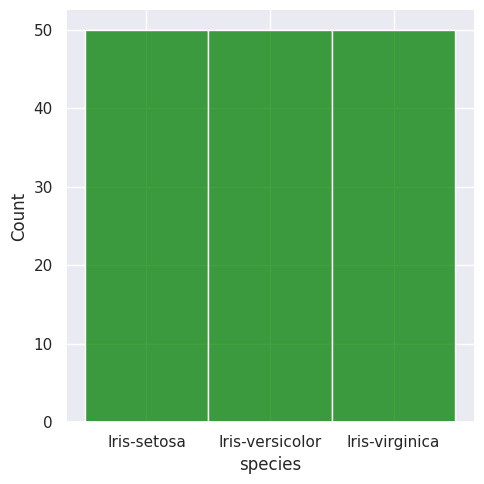

In [104]:
sns.displot(iris['species'],color='green');

>**Nota:** Observamos que el dataset esta `balanceado`, es decir, tiene la misma cantidad de registros para cada especie lo cual resulta beneficioso para eviatr que el modelo caiga en un mal aprendizaje.

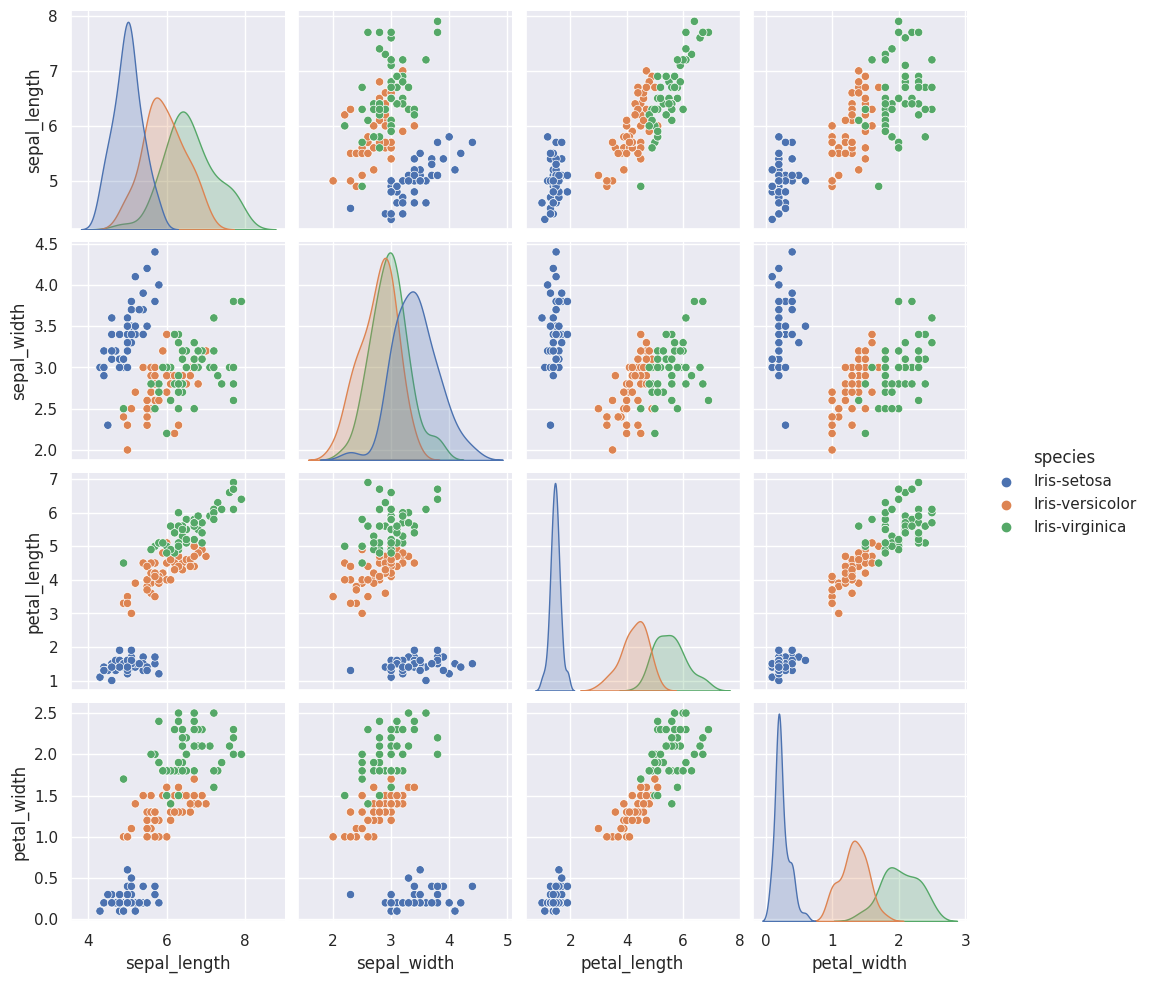

In [105]:
# Podemos usar un pairplot para correlacionar las variables explicativas
sns.pairplot(data=iris,hue='species')

## Armamos el dataset para entrenar

In [106]:
X = iris.drop(columns='species').to_numpy()
y = iris['species'].to_numpy()

from sklearn.model_selection import train_test_split
Xtrain, Xtest, ytrain, ytest = train_test_split(X, y, test_size = 0.25, random_state=42)

print(f"Set de entenamiento: {Xtrain.shape}, {ytrain.shape}")
print(f"Set de testeo: {Xtest.shape}, {ytest.shape}")

Set de entenamiento: (112, 4), (112,)
Set de testeo: (38, 4), (38,)


## Entrenamos el modelo Logistic Regression

El modelo logistic regression está construido para optimizar los párametros mediante el error de la función `BinaryCrossEntropy` para lo cual sería ideal dos clases.

Cuando existen más clases lo que hace es hacer en cada iteración una `clase vs todas las otras`de esta manera conserva el mismo principio.

Para setear el algoritmo en sklearn de logistic regression aplicado a multiclase, como en este caso que son 3 clases de flores, usamos el parametro `multi_class: {‘auto’, ‘ovr’, ‘multinomial’}` seteado en 'multinomial'.

In [107]:
from sklearn.linear_model import LogisticRegression
log_reg = LogisticRegression(multi_class='multinomial')
log_reg.fit(Xtrain,ytrain)

LogisticRegression(multi_class='multinomial')

## Evaluamos el modelo

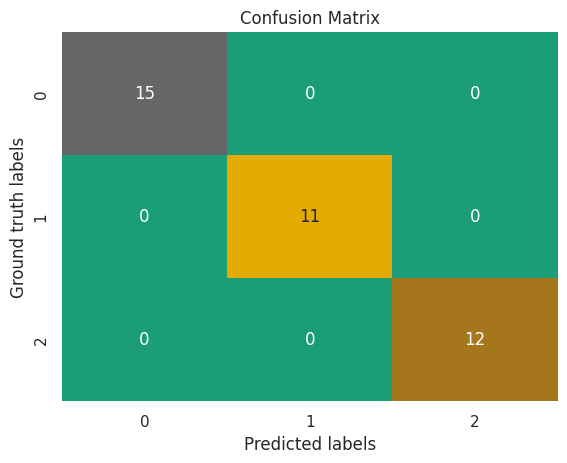

In [108]:
from sklearn import metrics as ms
y_pred_logreg = log_reg.predict(Xtest)
confusion_matrix = ms.confusion_matrix(y_true = ytest, y_pred = y_pred_logreg)
sns.heatmap(confusion_matrix,annot=True,cbar=False,cmap='Dark2')
plt.xlabel("Predicted labels")
plt.ylabel("Ground truth labels")
plt.title("Confusion Matrix");

In [109]:
acc_logreg = ms.accuracy_score(y_true = ytest, y_pred = y_pred_logreg)
precision_logreg = ms.precision_score(y_true = ytest, y_pred = y_pred_logreg,average='weighted')
recall_logreg = ms.recall_score(y_true = ytest, y_pred = y_pred_logreg,average='weighted')
f1_logreg = ms.f1_score(y_true = ytest, y_pred = y_pred_logreg,average='weighted')

logreg_metrics = {"Accuracy":acc_logreg,
                  "Precision":precision_logreg,
                  "Recall":recall_logreg,
                  "F1":f1_logreg}
logreg_metrics

{'Accuracy': 1.0, 'Precision': 1.0, 'Recall': 1.0, 'F1': 1.0}

## Predicción

Tomamos un conjunto de datos que represente las variables de entradas para ver que nos devuelve el modelo.

La idea es simular al modelo tomando datos nuevos, ya sea através de algun sensor de los datos:

* sepal_length
* sepal_width
* petal_length
* petal_width

In [110]:
#Creamos datos nuevos
X_prueba = np.array([[3.4, 1.9, 1.2, 0.3]]) # en el array tenemos: sepal_length,	sepal_width,	petal_length,	petal_width

#Luego predecimos
y_pred = log_reg.predict(X_prueba)

#Observamos la salida
print(f"Predicción del modelo: {y_pred}")

Predicción del modelo: ['Iris-setosa']




---



# Naive Bayes

Ahora el ejercicio es que repitan la experiencia que se realizó con Logistic Regression.

Para eso deben:
1. Explorar el dataset por su cuenta.
2. Anotar observaciones que ustedes concluyan.
3. Armar el dataset para entrenar y testear.
4. Implementar el algoritmo de Naive Bayes -> [MultinomialNB](https://scikit-learn.org/stable/modules/generated/sklearn.naive_bayes.MultinomialNB.html#sklearn.naive_bayes.MultinomialNB)
5. Evaluarlo con las metricas que hemos visto (ROC-AUC es solo para clasificación binaria).
6. Hacer un predicción.

### 1. Cargar Dataset

In [111]:
!wget https://raw.githubusercontent.com/amankharwal/Website-data/master/IRIS.csv

--2023-09-13 04:06:52--  https://raw.githubusercontent.com/amankharwal/Website-data/master/IRIS.csv
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.108.133, 185.199.109.133, 185.199.110.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.108.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 4617 (4.5K) [text/plain]
Saving to: ‘IRIS.csv.6’

IRIS.csv.6          100%[===================>]   4.51K  --.-KB/s    in 0s      

2023-09-13 04:06:52 (60.6 MB/s) - ‘IRIS.csv.6’ saved [4617/4617]



In [112]:
import numpy as np
import pandas as pd
data = pd.read_csv('IRIS.csv')
data.head(3)

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa


### 2. Analizar Dataset

In [113]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   sepal_length  150 non-null    float64
 1   sepal_width   150 non-null    float64
 2   petal_length  150 non-null    float64
 3   petal_width   150 non-null    float64
 4   species       150 non-null    object 
dtypes: float64(4), object(1)
memory usage: 6.0+ KB


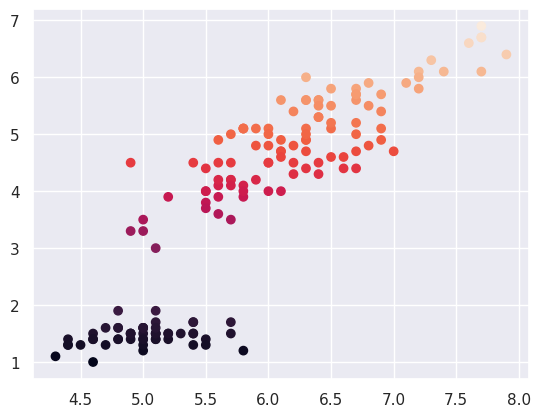

In [114]:
import matplotlib.pyplot as plt
plt.scatter(data['sepal_length'],data['petal_length'],c=data['petal_length']);

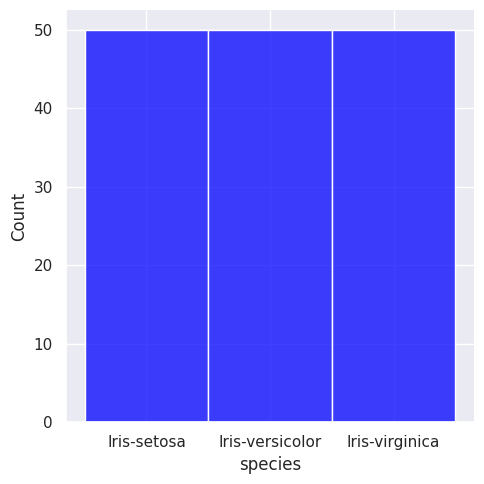

In [115]:
#cantidad de registros para cada especie
data['species'].value_counts()
#Grafico para ver si estan balanceados los datos
sns.displot(data['species'],color='blue');

**Todos los datos se encuentean balanceados**

<ipython-input-116-1e9da1670e47>:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(data.corr(), cmap='coolwarm', annot=True)


<Axes: >

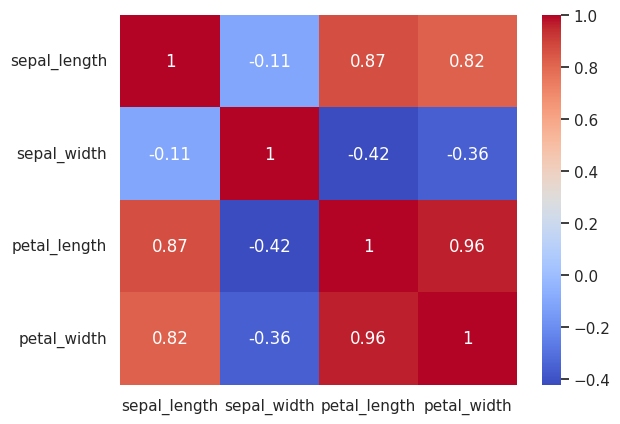

In [116]:
#heatmap y pairplot para ver correlacion entre las variables
sns.heatmap(data.corr(), cmap='coolwarm', annot=True)

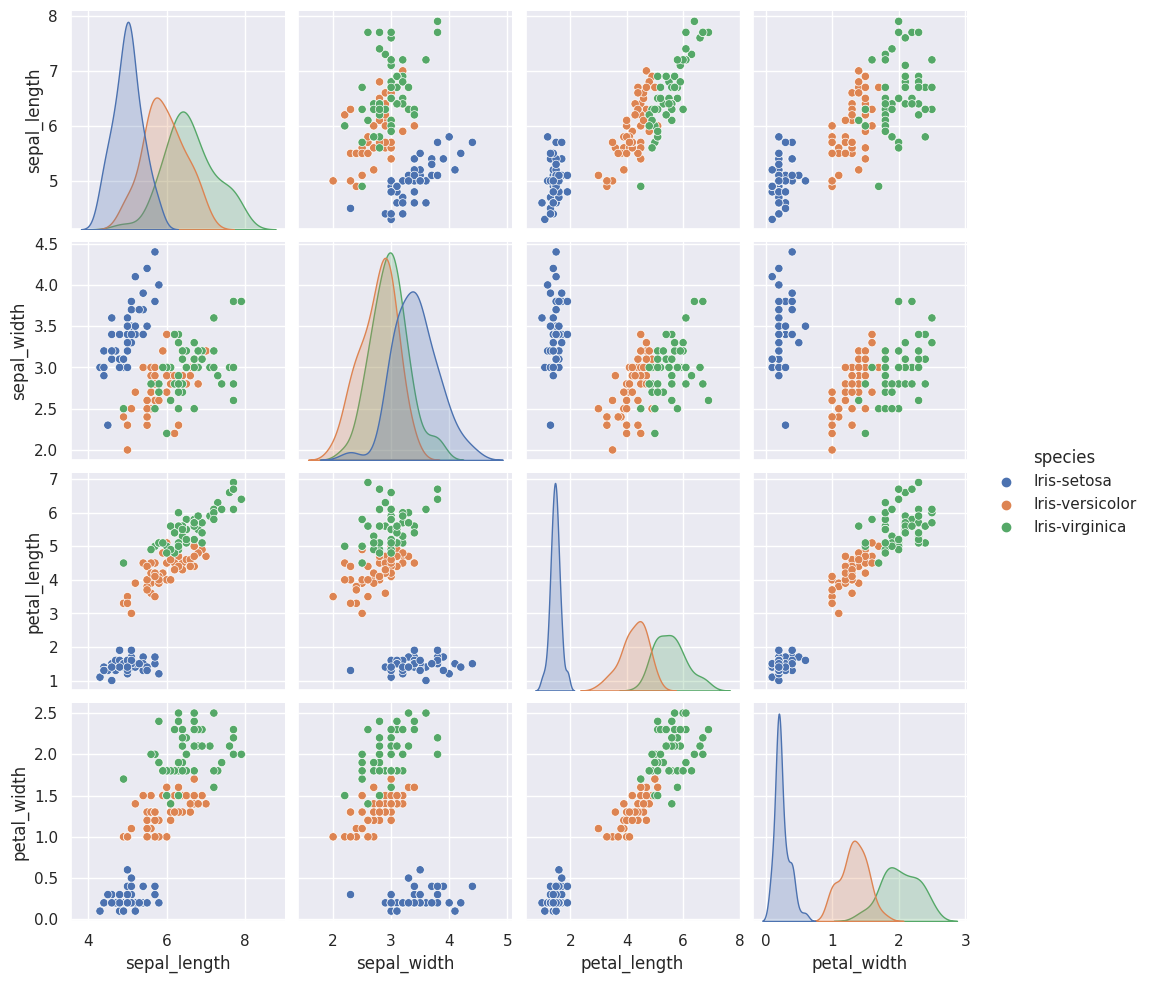

In [117]:
sns.pairplot(data=data,hue='species')

### 3. Armar Dataset para train y test

In [118]:
#Separamos los datos de forma estratificada para mantener la proporcion de distribución de Y
X = data.drop(columns='species').to_numpy()
Y = data['species'].to_numpy()

from sklearn.model_selection import train_test_split
Xtrain, Xtest, ytrain, ytest = train_test_split(X,Y, test_size=0.25, stratify= y, random_state=42)
print(f"Set de entrenamiento {Xtrain.shape}, {ytrain.shape}")
print(f"Set de testeo {Xtest.shape}, {ytest.shape}")

Set de entrenamiento (112, 4), (112,)
Set de testeo (38, 4), (38,)


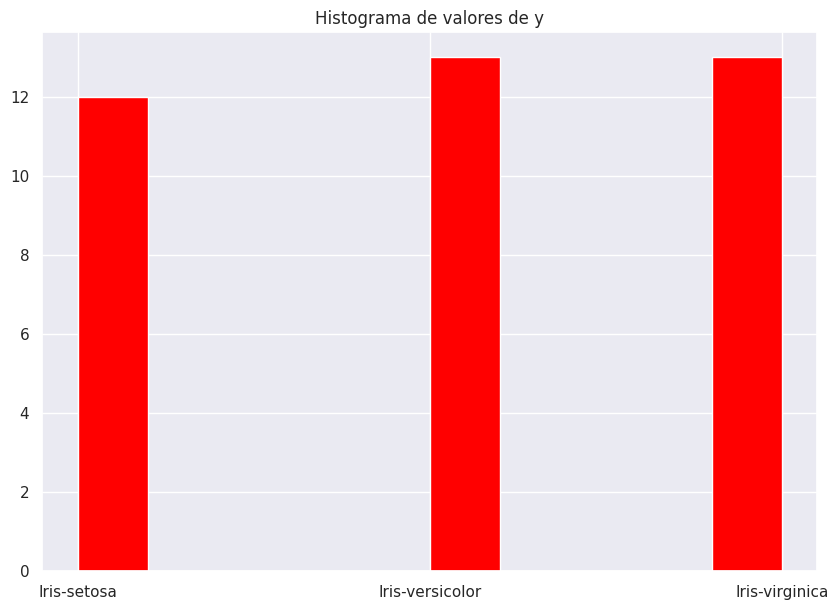

In [119]:
plt.figure(figsize=(10,7))
plt.hist(ytest,color='red')
plt.title("Histograma de valores de y");

### 4. Evaluar modelo de Naive Bayes

In [120]:
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression

In [121]:
model_naive = make_pipeline(StandardScaler(),LogisticRegression())
model_naive.fit(Xtrain,ytrain)

Pipeline(steps=[('standardscaler', StandardScaler()),
                ('logisticregression', LogisticRegression())])

### 5. Evaluar metricas

In [122]:
model_naive.predict_proba(Xtest)

array([[9.85158875e-01, 1.48407687e-02, 3.56082430e-07],
       [3.33673661e-02, 6.22005009e-01, 3.44627625e-01],
       [4.52130770e-02, 8.82339423e-01, 7.24474997e-02],
       [1.08647415e-02, 9.16108282e-01, 7.30269762e-02],
       [9.68741095e-01, 3.12581221e-02, 7.82536010e-07],
       [1.00409993e-01, 6.35117227e-01, 2.64472780e-01],
       [1.79109660e-03, 5.47223704e-01, 4.50985199e-01],
       [1.61070933e-04, 5.29715982e-02, 9.46867331e-01],
       [3.95990957e-05, 8.80529835e-02, 9.11907417e-01],
       [7.77107861e-05, 4.29749847e-02, 9.56947305e-01],
       [1.96842603e-02, 5.74979979e-01, 4.05335761e-01],
       [5.37508709e-05, 2.00266489e-02, 9.79919600e-01],
       [2.64920513e-02, 9.45392074e-01, 2.81158747e-02],
       [8.10233433e-02, 7.14174295e-01, 2.04802362e-01],
       [9.76043249e-01, 2.39553835e-02, 1.36706984e-06],
       [9.84134811e-01, 1.58647203e-02, 4.68973115e-07],
       [9.44289493e-01, 5.57082697e-02, 2.23723322e-06],
       [1.60871390e-02, 7.81242

In [123]:
model_naive.predict(Xtest)

array(['Iris-setosa', 'Iris-versicolor', 'Iris-versicolor',
       'Iris-versicolor', 'Iris-setosa', 'Iris-versicolor',
       'Iris-versicolor', 'Iris-virginica', 'Iris-virginica',
       'Iris-virginica', 'Iris-versicolor', 'Iris-virginica',
       'Iris-versicolor', 'Iris-versicolor', 'Iris-setosa', 'Iris-setosa',
       'Iris-setosa', 'Iris-versicolor', 'Iris-setosa', 'Iris-versicolor',
       'Iris-virginica', 'Iris-versicolor', 'Iris-virginica',
       'Iris-versicolor', 'Iris-virginica', 'Iris-versicolor',
       'Iris-setosa', 'Iris-virginica', 'Iris-setosa', 'Iris-virginica',
       'Iris-virginica', 'Iris-virginica', 'Iris-setosa', 'Iris-setosa',
       'Iris-setosa', 'Iris-setosa', 'Iris-virginica', 'Iris-versicolor'],
      dtype=object)

In [124]:
print(f"R2 en entrenamiento: {model_naive.score(Xtrain,ytrain)}")
print(f"R2 en testeo: {model_naive.score(Xtest,ytest)}")

R2 en entrenamiento: 0.9642857142857143
R2 en testeo: 0.9210526315789473


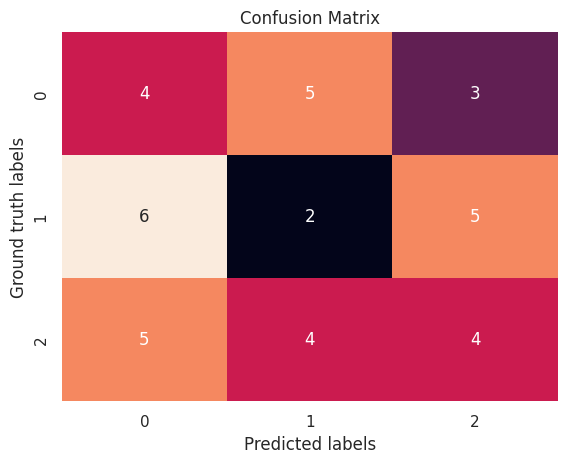

In [125]:
from sklearn import metrics as ms
y_pred_naive = model_naive.predict(Xtest)
confusion_matrix = ms.confusion_matrix(y_true = ytest, y_pred = y_pred_logreg)
sns.heatmap(confusion_matrix,annot=True,cbar=False)
plt.xlabel("Predicted labels")
plt.ylabel("Ground truth labels")
plt.title("Confusion Matrix");

In [126]:
# Calculamos las metricas más usuales para controlar la performance del modelo
# Estas metricas son: Accuracy, Precision, Recall, F1-score
# Las almacenamos en un diccionario

from sklearn import metrics as ms

acc_naive = ms.accuracy_score(y_true = ytest, y_pred = y_pred_naive)
precision_naive = ms.precision_score(y_true = ytest, y_pred = y_pred_naive,zero_division=0,average='weighted')
recall_naive = ms.recall_score(y_true = ytest, y_pred = y_pred_naive,zero_division=0,average='weighted')
f1_naive = ms.f1_score(y_true = ytest, y_pred = y_pred_naive,zero_division=0,average='weighted')

naive_metrics = {"Accuracy":acc_naive,
                  "Precision":precision_naive,
                  "Recall":recall_naive,
                  "F1":f1_naive}
naive_metrics

{'Accuracy': 0.9210526315789473,
 'Precision': 0.9226190476190477,
 'Recall': 0.9210526315789473,
 'F1': 0.9209356725146198}

**Los valores son mas cercanos a 1 que a 0, estos valores son bastantes buenos, por lo que esto seria un buen modelo para predecir.**

### 6. Hacer prediccion

In [127]:
#Creamos datos nuevos para luego predecir
X_prueba = np.array([[3.9, 1.1, 1.7, 0.8]]) # en el array tenemos: sepal_length,	sepal_width,	petal_length,	petal_width
y_pred = model_naive.predict(X_prueba)
print(f"Predicción del modelo: {y_pred}")

Predicción del modelo: ['Iris-versicolor']


### 7. Comparar metricas entre 2 modelos

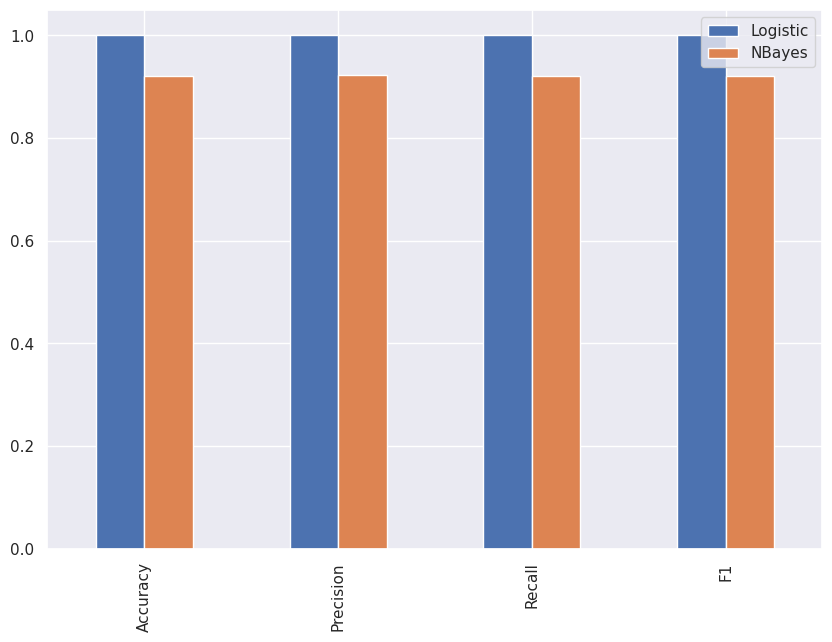

In [128]:
import pandas as pd
pd.DataFrame({"Logistic":logreg_metrics,"NBayes":naive_metrics}).plot(kind='bar',figsize=(10,7));

**Ambos modelos son buenos, pero por una diferencia minima, el mejor es el de Regresion Logistica**



---



# Algoritmo de ensamble del tipo Boosting

> 🦾 **Ejercicio Extra:** Si te animas te dejo el link para implementar un algoritmo de ensamble del tipo *Boosting* en este [link](https://scikit-learn.org/stable/modules/generated/sklearn.ensemble.AdaBoostClassifier.html). Podes repetir los pasos igual que en `Naive Bayes` y comparar cuál de los 3 te dio mejores métricas. Suerte 🤙

### 1. Cargar Dataset

In [129]:
!wget https://raw.githubusercontent.com/amankharwal/Website-data/master/IRIS.csv

--2023-09-13 04:07:00--  https://raw.githubusercontent.com/amankharwal/Website-data/master/IRIS.csv
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.108.133, 185.199.109.133, 185.199.110.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.108.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 4617 (4.5K) [text/plain]
Saving to: ‘IRIS.csv.7’

IRIS.csv.7          100%[===================>]   4.51K  --.-KB/s    in 0s      

2023-09-13 04:07:00 (59.4 MB/s) - ‘IRIS.csv.7’ saved [4617/4617]



In [130]:
import numpy as np
import pandas as pd
data = pd.read_csv('IRIS.csv')
data.head(3)

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa


### 2. Analizar Dataset

In [131]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   sepal_length  150 non-null    float64
 1   sepal_width   150 non-null    float64
 2   petal_length  150 non-null    float64
 3   petal_width   150 non-null    float64
 4   species       150 non-null    object 
dtypes: float64(4), object(1)
memory usage: 6.0+ KB


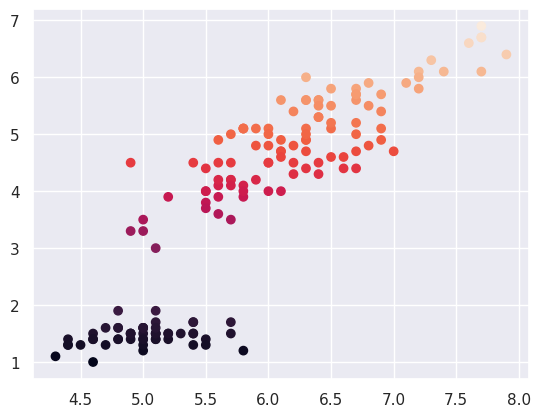

In [132]:
import matplotlib.pyplot as plt
plt.scatter(data['sepal_length'],data['petal_length'],c=data['petal_length']);

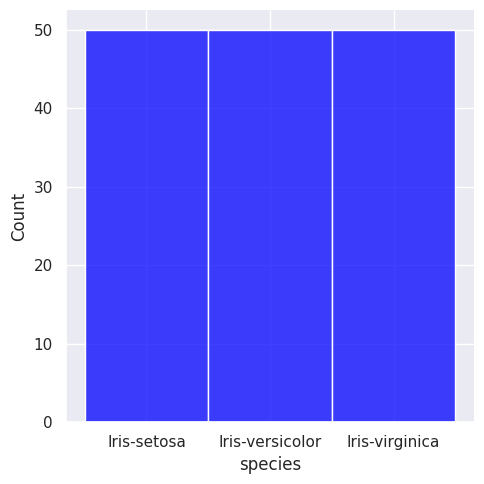

In [133]:
#cantidad de registros para cada especie
data['species'].value_counts()
#Grafico para ver si estan balanceados los datos
sns.displot(data['species'],color='blue');

**Todos los datos se encuentean balanceados**

<ipython-input-134-1e9da1670e47>:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(data.corr(), cmap='coolwarm', annot=True)


<Axes: >

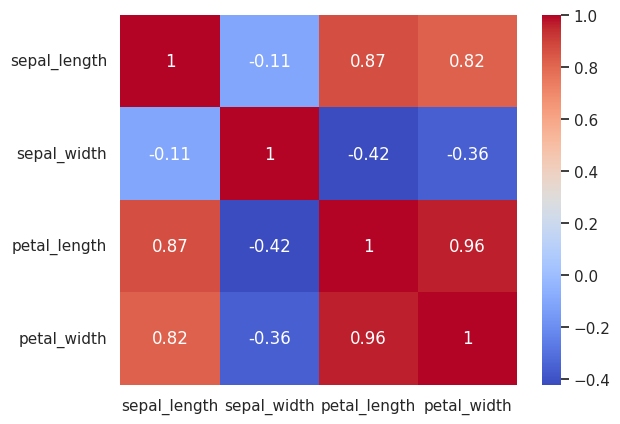

In [134]:
#heatmap y pairplot para ver correlacion entre las variables
sns.heatmap(data.corr(), cmap='coolwarm', annot=True)

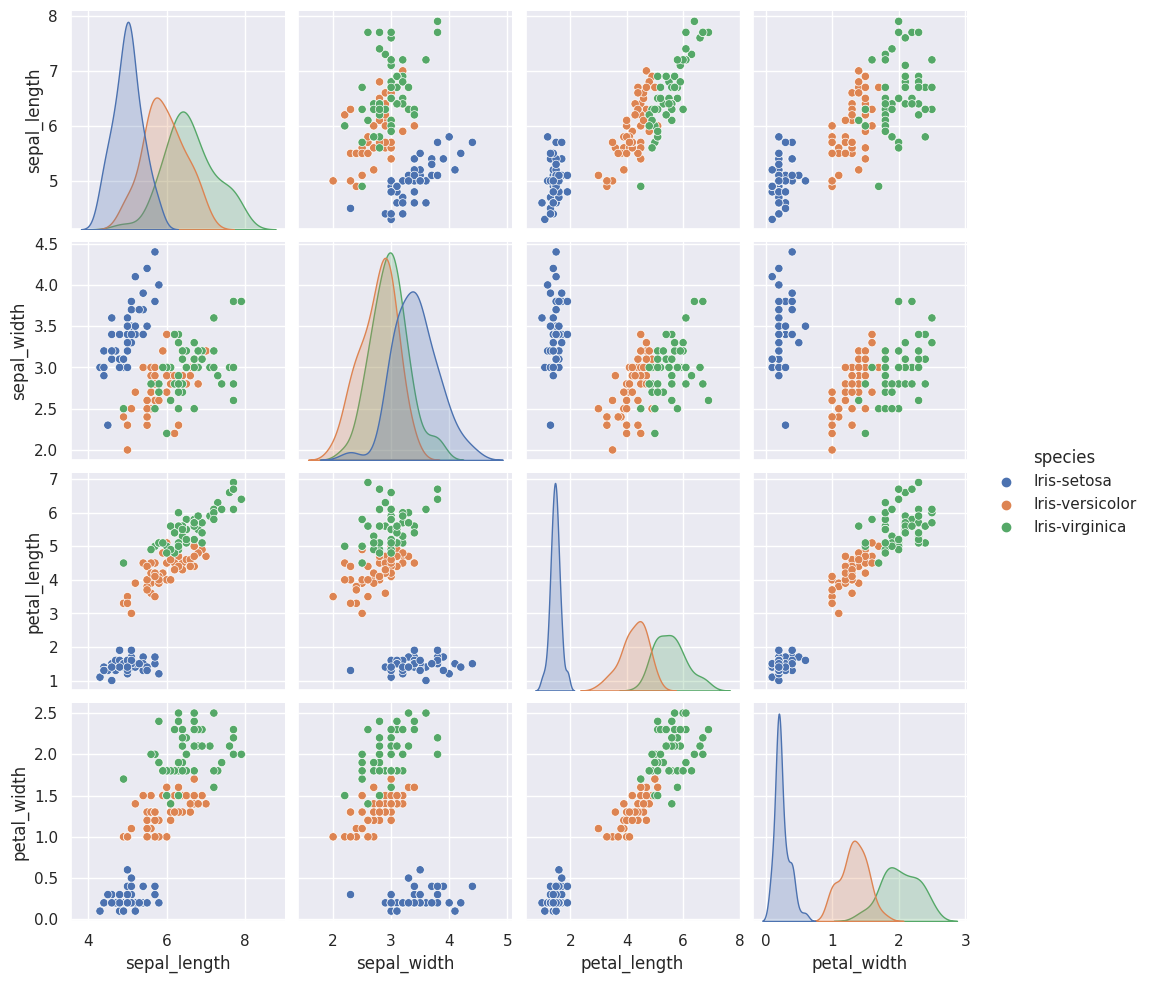

In [135]:
sns.pairplot(data=data,hue='species')

### 3. Armar Dataset para train y test

In [136]:
#Separamos los datos de forma estratificada para mantener la proporcion de distribución de Y
X = data.drop(columns='species').to_numpy()
Y = data['species'].to_numpy()

from sklearn.model_selection import train_test_split
Xtrain, Xtest, ytrain, ytest = train_test_split(X,Y, test_size=0.25, stratify= y, random_state=42)
print(f"Set de entrenamiento {Xtrain.shape}, {ytrain.shape}")
print(f"Set de testeo {Xtest.shape}, {ytest.shape}")

print(X.shape)
print(y.shape)

if X.shape[0] != y.shape[0]:
  print("X and y rows are mismatched, check dataset again")

Set de entrenamiento (112, 4), (112,)
Set de testeo (38, 4), (38,)
(150, 4)
(150,)


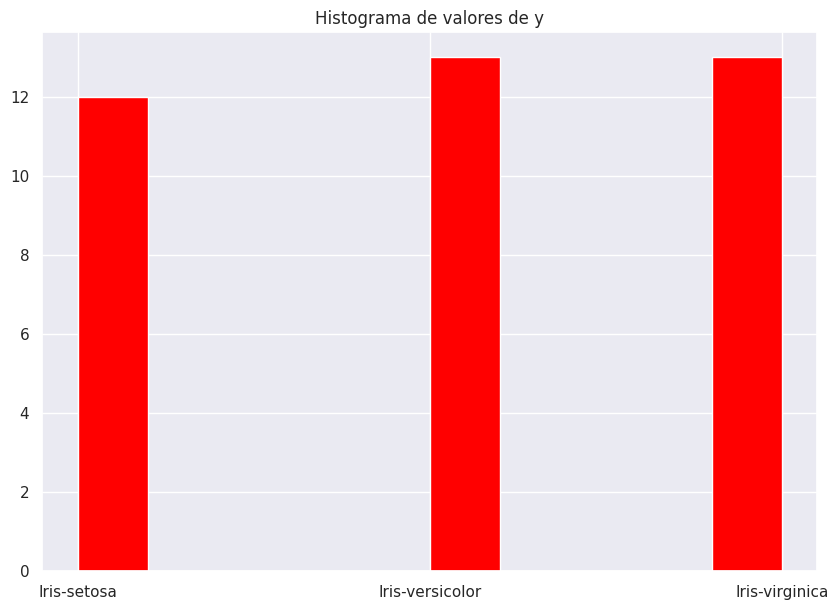

In [137]:
plt.figure(figsize=(10,7))
plt.hist(ytest,color='red')
plt.title("Histograma de valores de y");

### 4. Evaluar modelo

In [138]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import GradientBoostingClassifier
from sklearn import metrics

### 5. Evaluar metricas

In [139]:
#Crear y entrenar el modelo Gradient Boosting Classifier
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3)

In [140]:
#Inicializa el modelo de Gradient Boosting
boosting_model = GradientBoostingClassifier()

In [141]:
#Entrena el modelo
boosting_model.fit(X_train, y_train)

GradientBoostingClassifier()

### 6. Hacer prediccion

In [142]:
#Hacer predicciones
y_pred = boosting_model.predict(X_test)
x_pred = boosting_model.predict(X_train)

In [143]:
print("Accuracy:", metrics.accuracy_score(y_test, y_pred))

Accuracy: 0.9555555555555556


**Los valores son mas cercanos a 1 que a 0, estos valores son bastantes buenos, por lo que esto seria un buen modelo para predecir.**

In [144]:
from sklearn.metrics import precision_score, recall_score, f1_score

boosting_precision = precision_score(y_test, y_pred, average='micro')
boosting_recall = recall_score(y_test, y_pred, average='micro')
boosting_f1 = f1_score(y_test, y_pred, average='micro')

boosting_metrics = [boosting_precision, boosting_recall, boosting_f1]

In [145]:
#Creamos datos nuevos para luego predecir
y_pred = boosting_model.predict(X_prueba)
print(f"Predicción del modelo: {y_pred}")

Predicción del modelo: ['Iris-setosa']


### 7. Comparar metricas entre 3 modelos

In [147]:
#Convierte las listas de métricas en series de pandas
import pandas as pd

logreg_metrics = pd.Series(logreg_metrics, name="Logistic")
naive_metrics = pd.Series(naive_metrics, name="NBayes")
boosting_metrics = pd.Series(boosting_metrics, name="Boosting")

<Axes: >

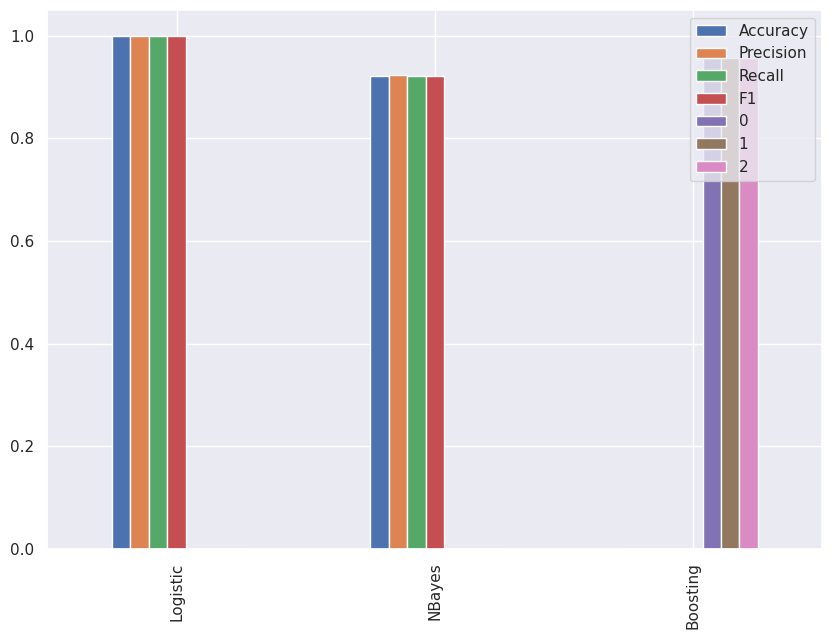

In [152]:
#Crea un DataFrame con las métricas y haz un gráfico de barras
df = pd.DataFrame([logreg_metrics, naive_metrics, boosting_metrics])
df.plot(kind='bar',figsize=(10,7))

**En este caso, notamos que el modelo Boosting seria un intermedio de Logistic y Bayes, siendo mejor que el segundo pero no tanto como el primero, aqui se demuestra que hay mayor diferencia entre Logistic y Bayes**



---

